## Data Cleaning 

In [ ]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np 

In [ ]:
# import injury player data 
injury_data = pd.read_csv('/content/Cleaned_Injury_Dataset.csv')
injury_data['index'] = injury_data['Year'] % 2000 - 7
injury_data.head()

,Year,Player,Pos,G,MP,PER,Team,Notes,index
0,2010,Udonis Haslem,PF,78,2177,14.6,Heat,placed on IL with torn ligament in left foot (...,3
1,2010,Jonas Jerebko,PF,80,2232,13.9,Pistons,placed on IL recovering from surgery to repair...,3
2,2010,Greg Oden,C,21,502,23.1,Blazers,placed on IL with left knee injury (out for se...,3
3,2011,Ryan Anderson,PF,64,1424,19.0,Magic,placed on IL (out for season),4
4,2011,Darrell Arthur,PF,80,1609,15.7,Grizzlies,ruptured right Achilles tendon (out for season),4


In [ ]:
# check that the data is from 2010 - 2017
print(injury_data['Year'].min())
print(injury_data['Year'].max())

2010
2017


In [ ]:
# get list of injured player names 
player_names = list(injury_data['Player'])
player_names[:10]

['Udonis Haslem',
 'Jonas Jerebko',
 'Greg Oden',
 'Ryan Anderson',
 'Darrell Arthur',
 'Omer Asik',
 'Marcus Banks',
 'Leandro Barbosa',
 'Andrea Bargnani',
 'Matt Barnes']

In [ ]:
len(player_names)

306

In [ ]:
# import player stats for every season by year, save to list 
stats_06_07 = pd.read_excel('/content/2006_2007_playerdata.xlsx').assign(Year=2006)
stats_08_09 = pd.read_excel('/content/2008_2009_playerdata.xlsx').assign(Year=2008)
stats_09_10 = pd.read_excel('/content/2009_2010_playerdata.xlsx').assign(Year=2009)
stats_10_11 = pd.read_excel('/content/2010_2011_playerdata.xlsx').assign(Year=2010)
stats_11_12 = pd.read_excel('/content/2011_2012_playerdata.xlsx').assign(Year=2011)
stats_12_13 = pd.read_excel('/content/2012_2013_playerdata.xlsx').assign(Year=2012)
stats_13_14 = pd.read_excel('/content/2013_2014_playerdata.xlsx').assign(Year=2013)
stats_14_15 = pd.read_excel('/content/2014_2015_playerdata.xlsx').assign(Year=2014)
stats_15_16 = pd.read_excel('/content/2015_2016_playerdata.xlsx').assign(Year=2015)
stats_16_17 = pd.read_excel('/content/2016_2017_playerdata.xlsx').assign(Year=2016)
stats_17_18 = pd.read_excel('/content/2017_2018_playerdata.xlsx').assign(Year=2017)
stats_18_19 = pd.read_excel('/content/2018_2019_playerdata.xlsx').assign(Year=2018)
stats_19_20 = pd.read_excel('/content/2019_2020_playerdata.xlsx').assign(Year=2019)
stats_20_21 = pd.read_excel('/content/2020_2021_playerdata.xlsx').assign(Year=2020)
stats_21_22 = pd.read_excel('/content/2021_2022_playerdata.xlsx').assign(Year=2021)
stats_list = [stats_06_07, stats_08_09, stats_09_10, stats_10_11, stats_11_12, stats_12_13, stats_13_14, stats_14_15, stats_15_16, stats_16_17, stats_17_18, stats_18_19, stats_19_20, stats_20_21, stats_21_22]
stats_21_22.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Precious Achiuwa,C,22.0,TOR,73.0,28.0,23.6,3.6,8.3,...,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,2021
1,2,Steven Adams,C,28.0,MEM,76.0,75.0,26.3,2.8,5.1,...,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,2021
2,3,Bam Adebayo,C,24.0,MIA,56.0,56.0,32.6,7.3,13.0,...,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,2021
3,4,Santi Aldama,PF,21.0,MEM,32.0,0.0,11.3,1.7,4.1,...,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1,2021
4,5,LaMarcus Aldridge,C,36.0,BRK,47.0,12.0,22.3,5.4,9.7,...,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,2021


In [ ]:
# EFF = (PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO) / GP
def getEFF(df): 
  EFF = (df['PTS'] + df['TRB'] + df['AST'] + df['STL'] + df['BLK'] - (df['FGA'] - df['FG']) - (df['FTA'] - df['FT']) - df['TOV'])
  return EFF

In [ ]:
# function for cleaning player stats 
def clean_data(df, player_names): 
  df['Player'] = df['Player'].str.replace('[^\w\s]', '')
  df = df.dropna()
  df = df.loc[df['Player'].isin(player_names)]
  df['EFF'] = getEFF(df) 
  df = df.groupby('Player').mean().reset_index()
  return df[['Player', 'EFF', 'Year']]

In [ ]:
# clean every data frame
i = 0
for df in stats_list: 
  stats_list[i] = clean_data(df, player_names)
  i += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# check cleaned df 
stats_list[2]

,Player,EFF,Year
0,Acie Law,4.1,2009.0
1,Al Horford,21.3,2009.0
2,Al Jefferson,20.0,2009.0
3,Alonzo Gee,6.9,2009.0
4,Amir Johnson,9.9,2009.0
...,...,...,...
135,Tyler Hansbrough,8.5,2009.0
136,Tyreke Evans,19.6,2009.0
137,Will Bynum,10.8,2009.0
138,Wilson Chandler,15.2,2009.0


In [ ]:
stats_list[14][stats_list[14]['Player'] == 'Joel Embiid']

,Player,EFF,Year
34,Joel Embiid,34.0,2021.0


In [ ]:
#from google.colab import files
#for i in range(len(stats_list)): 
  #stats_list[i].to_csv('player_stats_' + str(i) + '.csv', encoding = 'utf-8-sig') 
  #files.download('player_stats_' + str(i) + '.csv')


In [ ]:
player_bio = pd.read_csv('/content/all_seasons.csv')
player_bio

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,12300,Markieff Morris,MIA,32.0,205.74,111.130040,Kansas,USA,2011,1,...,7.6,2.6,1.4,4.5,0.059,0.089,0.197,0.547,0.116,2021-22
12301,12301,Markelle Fultz,ORL,24.0,193.04,94.800728,Washington,USA,2017,1,...,10.8,2.7,5.5,-5.3,0.010,0.116,0.265,0.517,0.448,2021-22
12302,12302,Marcus Smart,BOS,28.0,193.04,99.790240,Oklahoma State,USA,2014,1,...,12.1,3.8,5.9,9.3,0.018,0.093,0.179,0.540,0.245,2021-22
12303,12303,Marcus Garrett,MIA,23.0,195.58,92.986360,Kansas,USA,Undrafted,Undrafted,...,1.1,1.9,0.6,5.8,0.072,0.108,0.086,0.280,0.069,2021-22


In [ ]:
def first_four(word): 
  return int(word[:4])
player_bio['season'].apply(first_four)

0        1996
1        1996
2        1996
3        1996
4        1996
         ... 
12300    2021
12301    2021
12302    2021
12303    2021
12304    2021
Name: season, Length: 12305, dtype: int64

In [ ]:
player_bio['player_name'] = player_bio['player_name'].str.replace('[^\w\s]', '')
player_bio = player_bio.dropna()
player_bio = player_bio.loc[player_bio['player_name'].isin(player_names)]

# Update player names list to account for missing players 
player_names2 = list(pd.unique(player_bio['player_name']))

# New data frame containing the injured players bio one year before injury 
player_bio_new = pd.DataFrame()
for player in player_names2: 
  player_bio_new = player_bio_new.append(player_bio[player_bio['player_name'] == player][player_bio['season'].apply(first_four) == int(injury_data[injury_data['Player'] == player]['Year']) - 1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
player_bio_new = player_bio_new[['player_name', 'age', 'player_height', 'player_weight', 'draft_year', 'season']]
player_bio_new

,player_name,age,player_height,player_weight,draft_year,season
6337,Ben Wallace,36.0,205.74,108.862080,Undrafted,2010-11
7072,Jerry Stackhouse,37.0,198.12,98.883056,1995,2011-12
7835,Steve Nash,40.0,190.50,80.739376,1996,2013-14
6461,Kevin Garnett,35.0,210.82,114.758776,1995,2010-11
7298,Kobe Bryant,34.0,198.12,92.986360,1996,2012-13
...,...,...,...,...,...,...
9251,Malachi Richardson,21.0,198.12,92.986360,2016,2016-17
9331,Dario Saric,23.0,208.28,101.151016,2014,2016-17
9351,Diamond Stone,20.0,210.82,115.665960,2016,2016-17
9494,Joel Embiid,23.0,213.36,113.398000,2014,2016-17


In [ ]:
injury_data = injury_data.loc[injury_data['Player'].isin(player_bio_new.player_name)]
injury_data = injury_data.sort_values(by=['Player'])
player_bio_new = player_bio_new.sort_values(by=['player_name'])
player_names = list(injury_data['Player'])

In [ ]:
injury_data['Height'] = list(player_bio_new.player_height)
injury_data['Weight'] = list(player_bio_new.player_weight)
injury_data['Age'] = list(player_bio_new.age)
injury_data['Draft_year'] = list(player_bio_new.draft_year)

In [ ]:
prev_list = []
after_list = []
for player in player_names: 
  idx_year = injury_data[injury_data['Player'] == player]['index']
  if not stats_list[int(idx_year - 1)][stats_list[int(idx_year - 1)]['Player'] == player]['EFF'].empty: 
    prev_EFF = float(stats_list[int(idx_year - 1)][stats_list[int(idx_year - 1)]['Player'] == player]['EFF'])
  elif not stats_list[int(idx_year - 2)][stats_list[int(idx_year - 2)]['Player'] == player]['EFF'].empty: 
    prev_EFF = float(stats_list[int(idx_year - 2)][stats_list[int(idx_year - 2)]['Player'] == player]['EFF'])
  elif not stats_list[int(idx_year - 3)][stats_list[int(idx_year - 3)]['Player'] == player]['EFF'].empty: 
    prev_EFF = float(stats_list[int(idx_year - 3)][stats_list[int(idx_year - 3)]['Player'] == player]['EFF'])
  elif not stats_list[int(idx_year - 4)][stats_list[int(idx_year - 4)]['Player'] == player]['EFF'].empty: 
    prev_EFF = float(stats_list[int(idx_year - 4)][stats_list[int(idx_year - 4)]['Player'] == player]['EFF'])
  elif not stats_list[int(idx_year - 5)][stats_list[int(idx_year - 5)]['Player'] == player]['EFF'].empty:
    prev_EFF = float(stats_list[int(idx_year - 5)][stats_list[int(idx_year - 5)]['Player'] == player]['EFF'])
  else: 
    prev_EFF = np.NaN 

  if not stats_list[int(idx_year + 1)][stats_list[int(idx_year + 1)]['Player'] == player]['EFF'].empty: 
    after_EFF = float(stats_list[int(idx_year + 1)][stats_list[int(idx_year + 1)]['Player'] == player]['EFF'])
  elif not stats_list[int(idx_year + 2)][stats_list[int(idx_year + 2)]['Player'] == player]['EFF'].empty: 
    after_EFF = float(stats_list[int(idx_year + 2)][stats_list[int(idx_year + 2)]['Player'] == player]['EFF'])
  elif not stats_list[int(idx_year + 3)][stats_list[int(idx_year + 3)]['Player'] == player]['EFF'].empty:
    after_EFF = float(stats_list[int(idx_year + 3)][stats_list[int(idx_year + 3)]['Player'] == player]['EFF'])
  elif not stats_list[int(idx_year + 4)][stats_list[int(idx_year + 4)]['Player'] == player]['EFF'].empty:
    after_EFF = float(stats_list[int(idx_year + 4)][stats_list[int(idx_year + 4)]['Player'] == player]['EFF'])
  else: 
    after_EFF = np.NaN 
  prev_list.append(prev_EFF)
  after_list.append(after_EFF)
injury_data['Prev_EFF'] = prev_list
injury_data['After_EFF'] = after_list 


In [ ]:
injury_data['Prev_EFF'].isnull().sum()

35

In [ ]:
injury_data = injury_data.dropna()

In [ ]:
injury_data.head()

,Year,Player,Pos,G,MP,PER,Team,Notes,index,Height,Weight,Age,Draft_year,Prev_EFF,After_EFF
75,2012,Al Horford,C,11,348,19.0,Hawks,surgery to repair torn left pectoral muscle (o...,5,208.28,113.398000,26.0,2007,17.4,22.6
189,2015,Al Jefferson,C,65,1992,19.7,Hornets,sore right knee (out for season),8,208.28,131.088088,30.0,2004,18.9,9.4
136,2014,Alec Burks,SG,78,2193,15.8,Jazz,placed on IL with left shoulder injury (out fo...,7,198.12,95.707912,22.0,2011,12.2,10.4
197,2015,Alex Len,C,69,1518,13.5,Suns,fractured nose (out for season),8,215.90,115.665960,22.0,2013,11.4,11.9
139,2014,Allen Crabbe,SG,15,100,7.7,Blazers,placed on IL (out for season),7,198.12,95.254320,22.0,2013,1.7,9.6


In [ ]:
from google.colab import files

injury_data.to_csv('injury_data_cleaned2.csv', encoding = 'utf-8-sig') 
files.download('injury_data_cleaned2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from pandas.core import series
idx_year = 11
stats_list[int(idx_year - 3)][stats_list[int(idx_year - 3)]['Player'] == 'Joel Embiid']['EFF']

Series([], Name: EFF, dtype: float64)

In [ ]:
stats_list[int(idx_year - 3)][stats_list[int(idx_year - 3)]['Player'] == 'Kobe Bryant']['EFF'] + stats_list[int(idx_year - 2)][stats_list[int(idx_year - 2)]['Player'] == 'Joel Embiid']['EFF'] + stats_list[int(idx_year - 1)][stats_list[int(idx_year - 1)]['Player'] == 'Joel Embiid']['EFF']

65    NaN
73    NaN
106   NaN
Name: EFF, dtype: float64

##Building model

In [ ]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np 

In [ ]:
# import data 
injury_data = pd.read_csv('/content/Cleaned_Injury_Dataset3.csv')
injury_data = injury_data.iloc[:-1 , :]

In [ ]:
# Zion's data 
player_bio = pd.read_csv('/content/all_seasons.csv')
player_bio[player_bio['player_name'] == 'Zion Williamson']
player_bio.iloc[11365]['player_height']
zion_prev_eff = getEFF(stats_20_21[stats_20_21['Player'] == 'Zion Williamson'])
zion_data = [player_bio.iloc[11365]['player_height'], player_bio.iloc[11365]['player_weight'], player_bio.iloc[11365]['age'], float(zion_prev_eff), 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

NameError: ignored

In [ ]:
# one hot encoding and normalize data
one_hot_pos = pd.get_dummies(injury_data.Pos, prefix = 'Pos')
injury_data = injury_data.drop('Pos', axis = 1)
injury_data = injury_data.join(one_hot_pos)
from sklearn.preprocessing import MinMaxScaler 
def normalize_data(data): 
  scaler = MinMaxScaler()
  data['Height'] = scaler.fit_transform(data['Height'].values.reshape(-1,1))
  data['Weight'] = scaler.fit_transform(data['Weight'].values.reshape(-1,1))
  data['Age'] = scaler.fit_transform(data['Age'].values.reshape(-1,1))
  data['Prev_Avg_EFF'] = scaler.fit_transform(data['Prev_Avg_EFF'].values.reshape(-1,1))
  return data
injury_data = normalize_data(injury_data)
injury_data['Weight']

0      0.675000
1      1.000000
2      0.350000
3      0.716667
4      0.341667
         ...   
187    0.341667
188    0.466667
189    0.425000
190    0.133333
191    0.883333
Name: Weight, Length: 192, dtype: float64

In [ ]:
# get Blake Griffin's data for similarity testing with Zion
griffin_x = injury_data[injury_data['Player'] == 'Blake Griffin'][['Height', 'Weight', 'Age', 'Prev_Avg_EFF', 'Ankle ', 'Foot', 'Hip ', 'Knee', 'Finger', 'Shoulder', 'Back', 'Achilles', 'Hamstring', 'Other', 'Pos_C', 'Pos_PF',
       'Pos_PF-C', 'Pos_PF-SF', 'Pos_PG', 'Pos_PG-SG', 'Pos_SF', 'Pos_SF-PF',
       'Pos_SG', 'Pos_SG-PG']]
griffin_y = injury_data[injury_data['Player'] == 'Blake Griffin']['After_Avg_EFF']
griffin_prev_eff = injury_data[injury_data['Player'] == 'Blake Griffin']['Prev_Avg_EFF']

In [ ]:
# randomly split into train and test dataset 
train_dataset = injury_data.sample(frac=0.7, random_state=16)
test_dataset = injury_data.drop(train_dataset.index)

In [ ]:
train_dataset.columns

Index(['Unnamed: 0', 'Year', 'Player', 'G', 'MP', 'PER', 'Team', 'Notes',
       'index', 'Height', 'Weight', 'Age', 'Draft_year', 'Prev_Avg_EFF',
       'After_Avg_EFF', 'Ankle ', 'Foot', 'Hip ', 'Knee', 'Finger', 'Shoulder',
       'Back', 'Achilles', 'Hamstring', 'Other', 'Type ', 'Pos_C', 'Pos_PF',
       'Pos_PF-C', 'Pos_PF-SF', 'Pos_PG', 'Pos_PG-SG', 'Pos_SF', 'Pos_SF-PF',
       'Pos_SG', 'Pos_SG-PG'],
      dtype='object')

In [ ]:
# get features 
X_train = train_dataset[['Height', 'Weight', 'Age', 'Prev_Avg_EFF', 'Ankle ', 'Foot', 'Hip ', 'Knee', 'Finger', 'Shoulder', 'Back', 'Achilles', 'Hamstring', 'Other',  'Pos_C', 'Pos_PF',
       'Pos_PF-C', 'Pos_PF-SF', 'Pos_PG', 'Pos_PG-SG', 'Pos_SF', 'Pos_SF-PF',
       'Pos_SG', 'Pos_SG-PG']]
X_test = test_dataset[['Height', 'Weight', 'Age', 'Prev_Avg_EFF', 'Ankle ', 'Foot', 'Hip ', 'Knee', 'Finger', 'Shoulder', 'Back', 'Achilles', 'Hamstring', 'Other',  'Pos_C', 'Pos_PF',
       'Pos_PF-C', 'Pos_PF-SF', 'Pos_PG', 'Pos_PG-SG', 'Pos_SF', 'Pos_SF-PF',
       'Pos_SG', 'Pos_SG-PG']]

In [ ]:
# get labels 
y_train = train_dataset['After_Avg_EFF']
y_test = test_dataset['After_Avg_EFF']

In [ ]:
X_train

,Height,Weight,Age,Prev_Avg_EFF,Ankle,Foot,Hip,Knee,Finger,Shoulder,...,Pos_C,Pos_PF,Pos_PF-C,Pos_PF-SF,Pos_PG,Pos_PG-SG,Pos_SF,Pos_SF-PF,Pos_SG,Pos_SG-PG
66,0.352941,0.158333,0.60,0.570881,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
83,0.352941,0.233333,0.45,0.371648,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
187,0.411765,0.341667,0.25,0.478927,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
52,0.882353,0.633333,1.00,0.701149,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
140,0.941176,0.633333,0.25,0.268199,0.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,0.588235,0.466667,0.25,0.203065,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
80,0.529412,0.383333,0.00,0.084291,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
27,0.647059,0.591667,0.60,0.846743,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
137,0.764706,0.633333,0.35,0.298851,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
y_train

66      9.333333
83     10.300000
187    22.500000
52      6.300000
140     4.900000
         ...    
36      2.800000
80      2.400000
27     18.900000
137    13.300000
22      8.300000
Name: After_Avg_EFF, Length: 134, dtype: float64

In [ ]:
# get input shape 
input_shape = X_train.shape[1]
input_shape

24

[00:37:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
evs:  0.5012919583276919
r2:  0.49566704711441856
mae:  3.9455665527342023


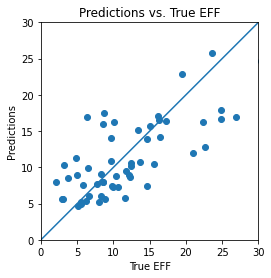

In [ ]:
from sklearn.metrics import explained_variance_score as evs
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as mae
import xgboost as xgb
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train, y_train)
xgb_pred = xgb_regressor.predict(X_test)
print('evs: ', evs(y_test, xgb_pred))
print('r2: ', r2(y_test, xgb_pred))
print('mae: ', mae(y_test, xgb_pred))
a = plt.axes(aspect='equal')
plt.scatter(y_test, xgb_pred)
plt.xlabel('True EFF')
plt.ylabel('Predictions')
plt.title('Predictions vs. True EFF')
lims = [0, 30]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers

In [ ]:
# first model 
# Set random seed
tf.random.set_seed(42)
model_1 = Sequential([
    layers.InputLayer(input_shape = input_shape),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)])
model_1.compile(loss='mean_absolute_error',
    optimizer=tf.keras.optimizers.Adam(0.001))
model_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                800       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,977
Trainable params: 2,977
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1_history = model_1.fit(X_train, y_train, epochs = 50, validation_data=(X_test, y_test), verbose = 1)

Epoch 1/50
5/5 [==============================] - 3s 145ms/step - loss: 10.9686 - val_loss: 11.9203
Epoch 2/50
5/5 [==============================] - 0s 9ms/step - loss: 10.7611 - val_loss: 11.7277
Epoch 3/50
5/5 [==============================] - 0s 6ms/step - loss: 10.5530 - val_loss: 11.5343
Epoch 4/50
5/5 [==============================] - 0s 7ms/step - loss: 10.3443 - val_loss: 11.3293
Epoch 5/50
5/5 [==============================] - 0s 8ms/step - loss: 10.1237 - val_loss: 11.1009
Epoch 6/50
5/5 [==============================] - 0s 6ms/step - loss: 9.8731 - val_loss: 10.8394
Epoch 7/50
5/5 [==============================] - 0s 7ms/step - loss: 9.5921 - val_loss: 10.5331
Epoch 8/50
5/5 [==============================] - 0s 8ms/step - loss: 9.2703 - val_loss: 10.1697
Epoch 9/50
5/5 [==============================] - 0s 7ms/step - loss: 8.8807 - val_loss: 9.7499
Epoch 10/50
5/5 [==============================] - 0s 7ms/step - loss: 8.4207 - val_loss: 9.2458
Epoch 11/50
5/5 [=======

In [ ]:
model_1.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 5.2135


5.213541030883789

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']



  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()


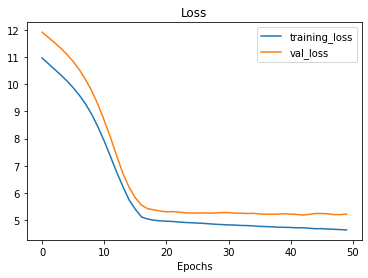

In [ ]:
plot_loss_curves(model_1_history)

In [ ]:
# Set random seed
tf.random.set_seed(42)
model_2 = Sequential([
    layers.InputLayer(input_shape = input_shape),
    layers.Dense(10, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(1)])
model_2.compile(loss='mean_absolute_error',
    optimizer=tf.keras.optimizers.Adam(0.001))
model_2.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 10)                250       
                                                                 
 dense_55 (Dense)            (None, 10)                110       
                                                                 
 dense_56 (Dense)            (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2_history = model_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100, verbose = 1)

Epoch 1/100
5/5 [==============================] - 0s 33ms/step - loss: 11.4438 - val_loss: 12.4076
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 11.3529 - val_loss: 12.3285
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 11.2681 - val_loss: 12.2562
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 11.1929 - val_loss: 12.1918
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 11.1248 - val_loss: 12.1338
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 11.0631 - val_loss: 12.0842
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 11.0102 - val_loss: 12.0415
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 10.9633 - val_loss: 12.0039
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 10.9212 - val_loss: 11.9709
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 10.8846 - val_loss: 11.9417
Epoch 11

In [ ]:
model_2.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 5.3999


5.399946212768555

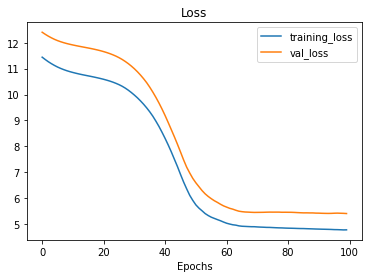

In [ ]:
plot_loss_curves(model_2_history)

In [ ]:
# Set random seed
tf.random.set_seed(42)
model_3 = Sequential([
    layers.InputLayer(input_shape = input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)])
model_3.compile(loss='mean_absolute_error',
    optimizer=tf.keras.optimizers.Adam(0.001))
model_3.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 64)                1600      
                                                                 
 dense_61 (Dense)            (None, 128)               8320      
                                                                 
 dense_62 (Dense)            (None, 1)                 129       
                                                                 
Total params: 10,049
Trainable params: 10,049
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3_history = model_3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 20, verbose = 1)

Epoch 1/20
5/5 [==============================] - 1s 31ms/step - loss: 10.5741 - val_loss: 11.4533
Epoch 2/20
5/5 [==============================] - 0s 7ms/step - loss: 10.2270 - val_loss: 11.0857
Epoch 3/20
5/5 [==============================] - 0s 6ms/step - loss: 9.8269 - val_loss: 10.6392
Epoch 4/20
5/5 [==============================] - 0s 6ms/step - loss: 9.3488 - val_loss: 10.0801
Epoch 5/20
5/5 [==============================] - 0s 11ms/step - loss: 8.7717 - val_loss: 9.3812
Epoch 6/20
5/5 [==============================] - 0s 7ms/step - loss: 8.0225 - val_loss: 8.5299
Epoch 7/20
5/5 [==============================] - 0s 6ms/step - loss: 7.1525 - val_loss: 7.5691
Epoch 8/20
5/5 [==============================] - 0s 6ms/step - loss: 6.2660 - val_loss: 6.6697
Epoch 9/20
5/5 [==============================] - 0s 7ms/step - loss: 5.5372 - val_loss: 6.0367
Epoch 10/20
5/5 [==============================] - 0s 6ms/step - loss: 5.1059 - val_loss: 5.6212
Epoch 11/20
5/5 [==============

In [ ]:
model_3.evaluate(X_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 5.4308


5.430810451507568

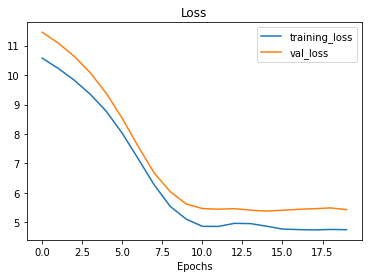

In [ ]:
plot_loss_curves(model_3_history)

2/2 [==============================] - 0s 18ms/step


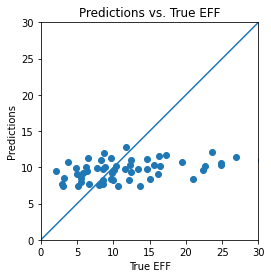

In [ ]:
# plot model 1 predictions comapred to true values 
model_1_predictions = model_1.predict(X_test).flatten()
a = plt.axes(aspect='equal')
plt.scatter(y_test, model_1_predictions)
plt.title('Predictions vs. True EFF')
plt.xlabel('True EFF')
plt.ylabel('Predictions')
lims = [0, 30]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

2/2 [==============================] - 0s 5ms/step


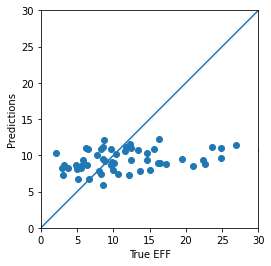

In [ ]:
# plot model 3 predictions comapred to true values 
model_3_predictions = model_3.predict(X_test).flatten()
a = plt.axes(aspect='equal')
plt.scatter(y_test, model_1_predictions)
plt.xlabel('True EFF')
plt.ylabel('Predictions')
lims = [0, 30]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

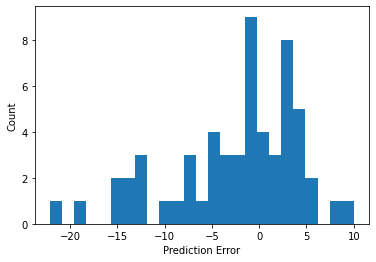

In [ ]:
# plot prediction error 
error = model_1_predictions - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

In [ ]:
r2(y_test, model_1_predictions)

0.050229052032177424

## Classification Model 

In [ ]:
# import data 
injury_data = pd.read_csv('/content/Cleaned_Injury_Dataset3.csv')
injury_data = injury_data.iloc[:-1 , :]

In [ ]:
# create new column as binary label 
injury_data['EFF_Improvement'] = ((injury_data['After_Avg_EFF'] - injury_data['Prev_Avg_EFF']) > 0).astype(int)

In [ ]:
injury_data

,Unnamed: 0,Year,Player,Pos,G,MP,PER,Team,Notes,index,...,Hip,Knee,Finger,Shoulder,Back,Achilles,Hamstring,Other,Type,EFF_Improvement
0,75.0,2012.0,Al Horford,C,11.0,348.0,19.0,Hawks,surgery to repair torn left pectoral muscle (o...,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Other,1
1,189.0,2015.0,Al Jefferson,C,65.0,1992.0,19.7,Hornets,sore right knee (out for season),8.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Knee,0
2,136.0,2014.0,Alec Burks,SG,78.0,2193.0,15.8,Jazz,placed on IL with left shoulder injury (out fo...,7.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Shoulder,1
3,197.0,2015.0,Alex Len,C,69.0,1518.0,13.5,Suns,fractured nose (out for season),8.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Knee,1
4,139.0,2014.0,Allen Crabbe,SG,15.0,100.0,7.7,Blazers,placed on IL (out for season),7.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Knee,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,262.0,2016.0,Victor Oladipo,SG,72.0,2379.0,16.7,Magic,placed on IL with concussion (out for season),9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Other,1
188,65.0,2012.0,Wilson Chandler,SF,8.0,215.0,9.0,Nuggets,placed on IL with groin injury (out for season),5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Other,1
189,27.0,2011.0,Xavier Henry,SG,38.0,527.0,7.0,Grizzlies,placed on IL with sprained right knee (out for...,4.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Knee,1
190,288.0,2017.0,Zach LaVine,SG,47.0,1749.0,14.6,Timberwolves,torn ACL in left knee (out for season),10.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Knee,1


In [ ]:
# one hot encode and normalize data 
one_hot_pos = pd.get_dummies(injury_data.Pos, prefix = 'Pos')
injury_data = injury_data.drop('Pos', axis = 1)
injury_data = injury_data.join(one_hot_pos)
from sklearn.preprocessing import MinMaxScaler 
def normalize_data(data): 
  scaler = MinMaxScaler()
  data['Height'] = scaler.fit_transform(data['Height'].values.reshape(-1,1))
  data['Weight'] = scaler.fit_transform(data['Weight'].values.reshape(-1,1))
  data['Age'] = scaler.fit_transform(data['Age'].values.reshape(-1,1))
  data['Prev_Avg_EFF'] = scaler.fit_transform(data['Prev_Avg_EFF'].values.reshape(-1,1))
  return data
injury_data = normalize_data(injury_data)
injury_data.head()

,Unnamed: 0,Year,Player,G,MP,PER,Team,Notes,index,Height,...,Pos_C,Pos_PF,Pos_PF-C,Pos_PF-SF,Pos_PG,Pos_PG-SG,Pos_SF,Pos_SF-PF,Pos_SG,Pos_SG-PG
0,75.0,2012.0,Al Horford,11.0,348.0,19.0,Hawks,surgery to repair torn left pectoral muscle (o...,5.0,0.764706,...,1,0,0,0,0,0,0,0,0,0
1,189.0,2015.0,Al Jefferson,65.0,1992.0,19.7,Hornets,sore right knee (out for season),8.0,0.764706,...,1,0,0,0,0,0,0,0,0,0
2,136.0,2014.0,Alec Burks,78.0,2193.0,15.8,Jazz,placed on IL with left shoulder injury (out fo...,7.0,0.529412,...,0,0,0,0,0,0,0,0,1,0
3,197.0,2015.0,Alex Len,69.0,1518.0,13.5,Suns,fractured nose (out for season),8.0,0.941176,...,1,0,0,0,0,0,0,0,0,0
4,139.0,2014.0,Allen Crabbe,15.0,100.0,7.7,Blazers,placed on IL (out for season),7.0,0.529412,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# split into train and test 
train_dataset = injury_data.sample(frac=0.7, random_state=27)
test_dataset = injury_data.drop(train_dataset.index)

In [ ]:
X_train = train_dataset[['Height', 'Weight', 'Age', 'Prev_Avg_EFF', 'Ankle ', 'Foot', 'Hip ', 'Knee', 'Finger', 'Shoulder', 'Back', 'Achilles', 'Hamstring', 'Other', 'Pos_C', 'Pos_PF',
       'Pos_PF-C', 'Pos_PF-SF', 'Pos_PG', 'Pos_PG-SG', 'Pos_SF', 'Pos_SF-PF',
       'Pos_SG', 'Pos_SG-PG']]
X_test = test_dataset[['Height', 'Weight', 'Age', 'Prev_Avg_EFF', 'Ankle ', 'Foot', 'Hip ', 'Knee', 'Finger', 'Shoulder', 'Back', 'Achilles', 'Hamstring', 'Other', 'Pos_C', 'Pos_PF',
       'Pos_PF-C', 'Pos_PF-SF', 'Pos_PG', 'Pos_PG-SG', 'Pos_SF', 'Pos_SF-PF',
       'Pos_SG', 'Pos_SG-PG']]

In [ ]:
X_train.columns

Index(['Height', 'Weight', 'Age', 'Prev_Avg_EFF', 'Ankle ', 'Foot', 'Hip ',
       'Knee', 'Finger', 'Shoulder', 'Back', 'Achilles', 'Hamstring', 'Other',
       'Pos_C', 'Pos_PF', 'Pos_PF-C', 'Pos_PF-SF', 'Pos_PG', 'Pos_PG-SG',
       'Pos_SF', 'Pos_SF-PF', 'Pos_SG', 'Pos_SG-PG'],
      dtype='object')

In [ ]:
y_train = train_dataset['EFF_Improvement']
y_test = test_dataset['EFF_Improvement']

In [ ]:
columns = X_train.columns

In [ ]:
y_train

9      1
12     1
117    1
77     0
63     1
      ..
160    1
1      0
75     0
112    1
173    0
Name: EFF_Improvement, Length: 134, dtype: int64

In [ ]:
input_shape = X_train.shape[1]

In [ ]:
# xgbclassifier 
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]


# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.41%


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


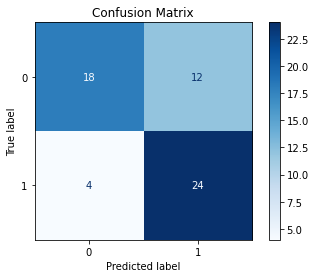

In [ ]:
# plot confusion matrix 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
confusion_matrix(y_test, y_pred, labels=model.classes_)
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# classification model 
model_4 = Sequential([
    layers.InputLayer(input_shape = input_shape),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)])
model_4.compile(loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.01), 
    metrics=['accuracy'])
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                800       
                                                                 
 dense_10 (Dense)            (None, 64)                2112      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2,977
Trainable params: 2,977
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4_history = model_4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 50, verbose = 1)

Epoch 1/50
5/5 [==============================] - 1s 38ms/step - loss: 1.4801 - accuracy: 0.4701 - val_loss: 0.7191 - val_accuracy: 0.4138
Epoch 2/50
5/5 [==============================] - 0s 5ms/step - loss: 0.6955 - accuracy: 0.5597 - val_loss: 0.7126 - val_accuracy: 0.5000
Epoch 3/50
5/5 [==============================] - 0s 8ms/step - loss: 0.6241 - accuracy: 0.6567 - val_loss: 0.7549 - val_accuracy: 0.5690
Epoch 4/50
5/5 [==============================] - 0s 6ms/step - loss: 0.6839 - accuracy: 0.6791 - val_loss: 1.1641 - val_accuracy: 0.5862
Epoch 5/50
5/5 [==============================] - 0s 11ms/step - loss: 0.6360 - accuracy: 0.7463 - val_loss: 0.6644 - val_accuracy: 0.6552
Epoch 6/50
5/5 [==============================] - 0s 7ms/step - loss: 0.6241 - accuracy: 0.7090 - val_loss: 1.0713 - val_accuracy: 0.6897
Epoch 7/50
5/5 [==============================] - 0s 6ms/step - loss: 0.6020 - accuracy: 0.7313 - val_loss: 1.0625 - val_accuracy: 0.7241
Epoch 8/50
5/5 [================

In [ ]:
model_4.evaluate(X_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 1.8026 - accuracy: 0.6207


[1.8025946617126465, 0.6206896305084229]

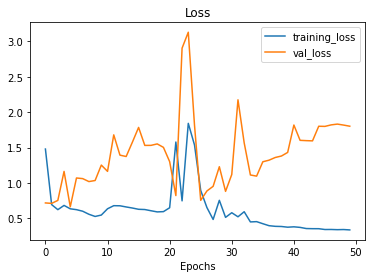

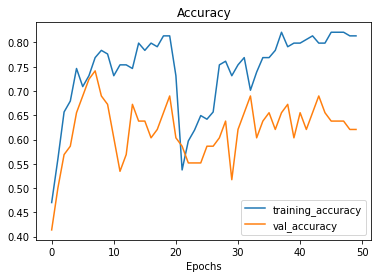

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();
plot_loss_curves(model_4_history)

In [ ]:
# classification model 2
model_5 = Sequential([
    layers.InputLayer(input_shape = input_shape),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)])
model_5.compile(loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001), 
    metrics=['accuracy'])
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                800       
                                                                 
 dense_13 (Dense)            (None, 64)                2112      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2,977
Trainable params: 2,977
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_5_history = model_5.fit(X_train, y_train, epochs = 200, verbose = 1)

Epoch 1/200
5/5 [==============================] - 0s 3ms/step - loss: 1.0292 - accuracy: 0.4925
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7529 - accuracy: 0.5149
Epoch 3/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7289 - accuracy: 0.5075
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7123 - accuracy: 0.5075
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.5149
Epoch 6/200
5/5 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.5448
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: 0.6534 - accuracy: 0.5224
Epoch 8/200
5/5 [==============================] - 0s 2ms/step - loss: 0.6378 - accuracy: 0.5746
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 0.6253 - accuracy: 0.5970
Epoch 10/200
5/5 [==============================] - 0s 2ms/step - loss: 0.6131 - accuracy: 0.6269
Epoch 11/200
5/5 [===========

In [ ]:
model_5.evaluate(X_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 2.1127 - accuracy: 0.7069


[2.112745761871338, 0.7068965435028076]

In [ ]:
model.predict(zion_df)

array([1])

## Get zion williamson data 

In [ ]:
player_bio = pd.read_csv('/content/all_seasons.csv')
player_bio[player_bio['player_name'] == 'Zion Williamson']
player_bio.iloc[11365]['player_height']
zion_prev_eff = getEFF(stats_20_21[stats_20_21['Player'] == 'Zion Williamson'])
zion_data = [player_bio.iloc[11365]['player_height'], player_bio.iloc[11365]['player_weight'], player_bio.iloc[11365]['age'], float(zion_prev_eff), 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
zion_df = pd.DataFrame(zion_data).transpose()
zion_df.columns = columns 

In [ ]:
player_bio[player_bio['player_name'] == 'Zion Williamson']

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
10799,10799,Zion Williamson,NOP,19.0,198.12,128.820128,Duke,USA,2019,1,...,22.5,6.3,2.1,5.1,0.092,0.114,0.291,0.616,0.119,2019-20
11365,11365,Zion Williamson,NOP,20.0,200.66,128.820128,Duke,USA,2019,1,...,27.0,7.2,3.7,2.1,0.081,0.131,0.287,0.649,0.188,2020-21


In [ ]:
# calculate prev EFF 
def getEFF(df): 
  EFF = (df['PTS'] + df['TRB'] + df['AST'] + df['STL'] + df['BLK'] - (df['FGA'] - df['FG']) - (df['FTA'] - df['FT']) - df['TOV'])
  return EFF

zion_prev_eff = getEFF(stats_20_21[stats_20_21['Player'] == 'Zion Williamson'])
zion_prev_eff

688    27.4
dtype: float64

In [ ]:
# import data 
injury_data = pd.read_csv('/content/Cleaned_Injury_Dataset3.csv')
injury_data = injury_data.iloc[:-1 , :]
one_hot_pos = pd.get_dummies(injury_data.Pos, prefix = 'Pos')
injury_data = injury_data.drop('Pos', axis = 1)
injury_data = injury_data.join(one_hot_pos)
injury_data_features = injury_data[columns]
injury_data_features.loc[len(df.index)] = zion_data
injury_data_features
print(injury_data_features.head())

   Height      Weight   Age  Prev_Avg_EFF  Ankle   Foot  Hip   Knee  Finger  \
0  208.28  113.398000  26.0          16.4     0.0   0.0   0.0   0.0     0.0   
1  208.28  131.088088  30.0          23.1     0.0   0.0   0.0   1.0     0.0   
2  198.12   95.707912  22.0           5.9     0.0   0.0   0.0   0.0     0.0   
3  215.90  115.665960  22.0          11.4     0.0   0.0   0.0   1.0     0.0   
4  198.12   95.254320  22.0           1.7     0.0   0.0   0.0   1.0     0.0   

   Shoulder  ...  Pos_C  Pos_PF  Pos_PF-C  Pos_PF-SF  Pos_PG  Pos_PG-SG  \
0       0.0  ...    1.0     0.0       0.0        0.0     0.0        0.0   
1       0.0  ...    1.0     0.0       0.0        0.0     0.0        0.0   
2       1.0  ...    0.0     0.0       0.0        0.0     0.0        0.0   
3       0.0  ...    1.0     0.0       0.0        0.0     0.0        0.0   
4       0.0  ...    0.0     0.0       0.0        0.0     0.0        0.0   

   Pos_SF  Pos_SF-PF  Pos_SG  Pos_SG-PG  
0     0.0        0.0     0.0    

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [ ]:
injury_data[injury_data['Player'] == 'Blake Griffin']['After_Avg_EFF']

18    23.6
Name: After_Avg_EFF, dtype: float64

In [ ]:
griffin_dataframe = pd.DataFrame({
    'Name': ['Zion Williamson', 'Blake Griffin'],
    'Height': ['200.66 cm', '208.28 cm'], 
    'Weight': ['128.82 kg', '113.85 kg'], 
    'Age (Injury)': ['20', '24'], 
    'Prev EFF': ['27.4', '25.6'], 
    'Injury Type': ['Foot', 'Hamstring'], 
    'Position': ['Power Foward', 'Power Foward'],
    'After EFF': ['---', '23.6']
})
griffin_dataframe.reset_index(drop=True, inplace=True)
griffin_dataframe

,Name,Height,Weight,Age (Injury),Prev EFF,Injury Type,Position,After EFF
0,Zion Williamson,200.66 cm,128.82 kg,20,27.4,Foot,Power Foward,---
1,Blake Griffin,208.28 cm,113.85 kg,24,25.6,Hamstring,Power Foward,23.6


In [ ]:
zion_dataframe = pd.DataFrame({
    'Name': ['Zion Williamson'],
    'Height': ['200.66 cm'], 
    'Weight': ['128.82 kg'], 
    'Age (Injury)': ['20'], 
    'Prev EFF': ['27.4'], 
    'Injury Type': ['Foot'], 
    'Position': ['Power Foward']
})
zion_dataframe.reset_index(drop=True, inplace=True)
zion_dataframe

,Name,Height,Weight,Age (Injury),Prev EFF,Injury Type,Position
0,Zion Williamson,200.66 cm,128.82 kg,20,27.4,Foot,Power Foward


In [ ]:
# Normalize zion's data
from sklearn.preprocessing import MinMaxScaler 
def normalize_data(data): 
  scaler = MinMaxScaler()
  data['Height'] = scaler.fit_transform(data['Height'].values.reshape(-1,1))
  data['Weight'] = scaler.fit_transform(data['Weight'].values.reshape(-1,1))
  data['Age'] = scaler.fit_transform(data['Age'].values.reshape(-1,1))
  data['Prev_Avg_EFF'] = scaler.fit_transform(data['Prev_Avg_EFF'].values.reshape(-1,1))
  return data

zion_df1 = normalize_data(injury_data_features)
zion_df = zion_df1[-1:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
model_3.predict(zion_df)

1/1 [==============================] - 0s 16ms/step


array([[10.668025]], dtype=float32)

In [ ]:
model_4.predict(zion_df)

1/1 [==============================] - 0s 23ms/step


array([[0.50463045]], dtype=float32)

In [ ]:
# predict Zion's EFF
print("Zion Williamson's predicted EFF: ", xgb_regressor.predict(zion_df))

Zion Williamson's predicted EFF:  [22.38816]


In [ ]:
# predict Griffin's EFF 
xgb_regressor.predict(griffin_x)

array([25.834845], dtype=float32)

In [ ]:
# Griffin's true EFF
griffin_y

18    23.6
Name: After_Avg_EFF, dtype: float64